<h1>Содержание проекта по A/B тестированию и проверке гипотез<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Выдвижение-и-проверка-гипотез" data-toc-modified-id="Выдвижение-и-проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выдвижение и проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование 

Аналитика деятельности интернет-магазина с целью проверки гипотез в группе A и группе B

- **Цель:**
- проанализировать данные, приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
- провести А/В тест и сделать выводы по итогам.
- **Данные:**
-/datasets/hypothesis.csv  - данные о гипотезах
-/datasets/orders.csv и /datasets/visitors.csv

## Изучение данных из файла

Импортируем нужные библиотеки для анализа

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from scipy import stats as st
import scipy.stats as stats
import math
import warnings
from scipy.stats import levene


warnings.filterwarnings('ignore')

Введём переменные 

In [2]:
hypothesis = pd.read_csv('https://www.dropbox.com/s/wtn3lapvyk4s5dw/hypothesisAB.csv?dl=1')
orders = pd.read_csv('https://www.dropbox.com/s/e19onndar16xho7/orders.csv?dl=1')
visits = pd.read_csv('https://www.dropbox.com/s/6t8dx2i3r9r9001/visitors.csv?dl=1')

Изучим информацию о фреймах данных

In [3]:
print(hypothesis.info())
print(orders.info())
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 colum

### Вывод

фреймы имеют столбцы с датами с типом данных object, а также названия столбцов с разным регистром. Приведём данные в соответствие для анализ

## Предобработка данныха

In [4]:
orders['date'] = pd.to_datetime(orders['date']) #меняем типы серий, приводим их к дате
visits['date'] = pd.to_datetime(visits['date'])

In [5]:
hypothesis.columns = hypothesis.columns.str.lower() #меняем регистр названий столбцов

### Вывод

In [6]:
users_group_A = orders.query('group == "A"')['visitorId']
users_group_B = orders.query('group == "B"')['visitorId']
#duplicated_group_users = orders.query('visitorId')


In [7]:
users_group_A = users_group_A.drop_duplicates()
users_group_A = users_group_A.tolist()
users_group_B = users_group_B.drop_duplicates()
users_group_B.tolist()
duplicated_groups = list(set(users_group_A) & set(users_group_B))


In [8]:

orders[orders['visitorId'].isin(duplicated_groups) == False]


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [9]:
orders = orders[orders['visitorId'].isin(duplicated_groups) == False]

In [10]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## Расчёты и добавление результатов в таблицу

рассчитаем необходимые метрики в соответствии с формулами:

In [11]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Отсортируем фрейм гипотез по метрике ICE, по убыванию.

In [12]:
hypothesis.sort_values(by = 'ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Тоже самое для метрики RICE

In [13]:
hypothesis.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


***Промежуточный вывод*** Сортированная иерархия гипотез по методами rice и ice отличается по причине использования дополнительного параметра в методе rice, который учитывает охват (reach) для каждого внедрения (изменения). Например: изменение формы подписки на всех основных страницах очевидно имеет наибольший охват среди прочих изменений, поэтому rice этой гипотезы оставляет все остальные гипотезы позади. При этом проведение акции в определённый день - очень сильная гипотеза, если не учитывать масштаб её охвата.

Построим график кумулятивной выручки по группам (Урок - стабильность кумулятивных метрик)
Найдём 90 перцентили (Урок - анализ выбросов и всплесков: крайние значения данных)
Считаем статистическую значимость различий (Урок - анализ А/B шаг за шагом)
Сделать выводы и решения.

Соберём кумулятивные данные в единый фрейм:

In [14]:
orders[['date','group']].duplicated().value_counts() #оценим наличие дубликатов значений

True     954
False     62
dtype: int64

In [15]:
datesGroups = orders[['date','group']].drop_duplicates() #сформируем пары даты-группы для аггрегированного фрейма

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max','group' : 'max','transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [16]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [17]:
#саггрегируем и сгруппируем фреймы по датам из логики "суммируем всё, что раньше определённой даты" группируем по дате и группе
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max','group' : 'max',
'visitors' : pd.Series.sum}), axis=1).sort_values(by=['date','group']) 

In [18]:
#мерджим фреймы с заказами и посещениями по дате и группе
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [19]:
#переименовываем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
#разбиваем фрем по группам А и Б
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

### Вывод

Данные предобработаны, готовы к первичному анализу и визуализациям

## Исследовательский и статистический анализ данных

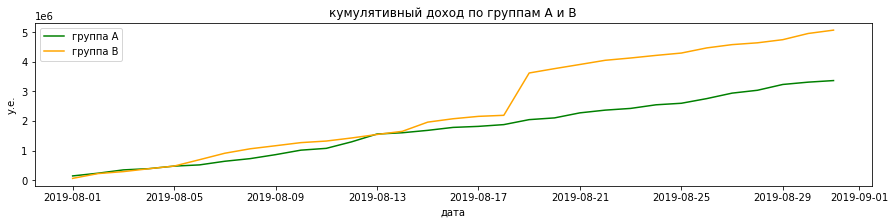

In [21]:
plt.figure(figsize = (15,3))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A', color = 'green')
plt.title('кумулятивный доход по группам А и B')
plt.xlabel("дата")    
plt.ylabel("у.е.") 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B', color = 'orange')

plt.legend()
plt.show()

Построим график среднего чека по дням:

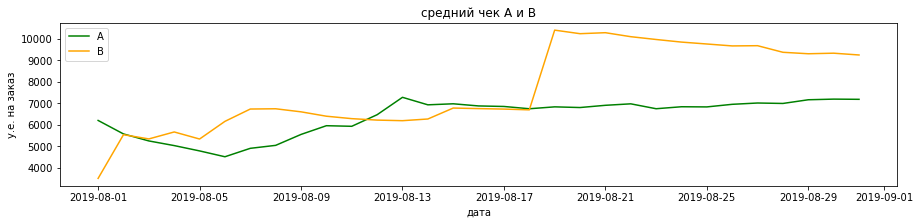

In [22]:
plt.figure(figsize = (15,3))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color = 'green')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color = 'orange')
plt.xlabel("дата")    
plt.ylabel("у.е. на заказ") 
plt.title('средний чек А и B')
plt.legend() 
plt.show()

построим график относительного различия

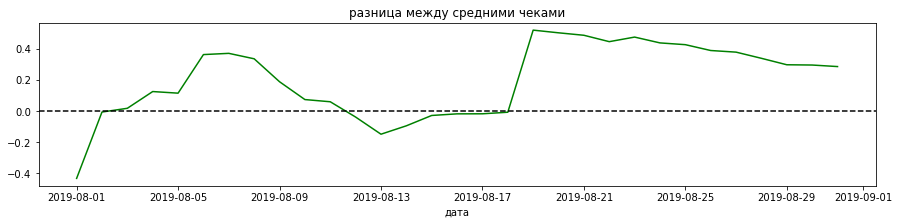

In [23]:
plt.figure(figsize = (15,3))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 
# cтроим отношение средних чеков
plt.title('разница между средними чеками')
plt.xlabel("дата")    
 
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color = 'green')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Метрика B очевидно опережает, однако между 18 и 19 августа есть аномалия. Данные следует отфильтровать.

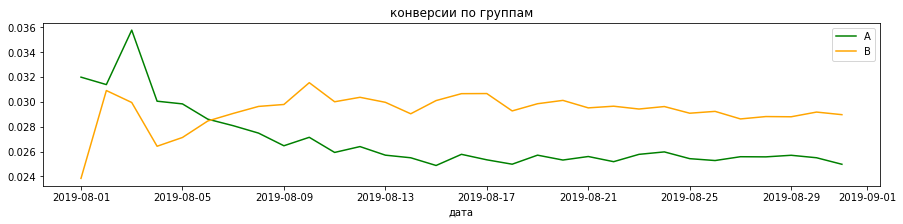

In [24]:
#строим график конверсий по группам
plt.figure(figsize = (15,3))

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] 

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'green')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color = 'orange')
plt.xlabel("дата")    

plt.title('конверсии по группам')
plt.legend()
plt.show()

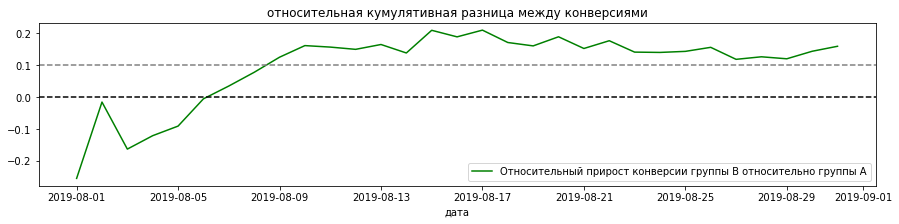

In [25]:
#строим граффик отличий кумулятивных конверсий между группами а и б
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 
plt.figure(figsize = (15,3))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A", color = 'green')
plt.legend()
plt.xlabel("дата")    

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.1, color='grey', linestyle='--')
plt.title('относительная кумулятивная разница между конверсиями')
plt.show()

создадим фрейм с группировкой количества заказов по пользователям для реализации скаттера (в рамках оценки аномалий)

In [26]:
ordersbyusers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))

In [27]:
ordersbyusers.columns = ['userId', 'orders']

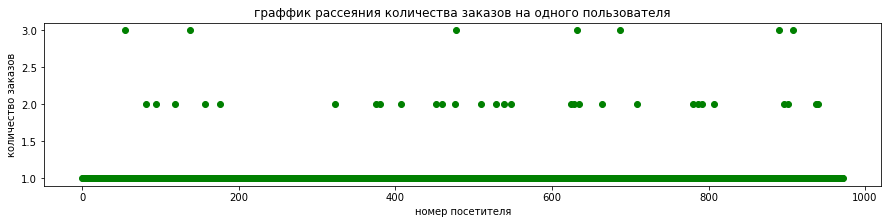

In [28]:
plt.figure(figsize = (15,3))
x_values = pd.Series(range(0, len(ordersbyusers)))
plt.title('граффик рассеяния количества заказов на одного пользователя')
plt.xlabel("номер посетителя")    
plt.ylabel("количество заказов") 
plt.scatter(x_values, ordersbyusers['orders'], color = 'green')
plt.show()

Видны явные выбросы, которые следует отсечь. Обратимся к перцентилям

In [29]:
print(np.percentile(ordersbyusers['orders'], [95,99]))

[1. 2.]


не более 5% совершали более 2х заказов, не более 1% - больше 4х.

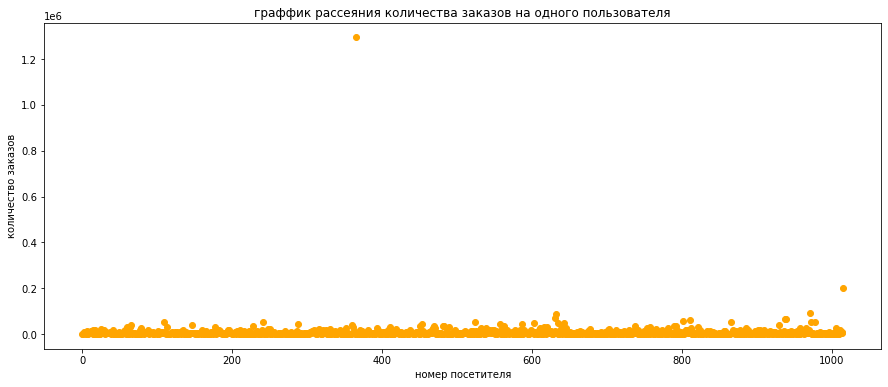

In [30]:
#построим скаттер для доходов
plt.figure(figsize = (15,6))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.xlabel("номер посетителя")    
plt.ylabel("количество заказов") 
plt.title('граффик рассеяния количества заказов на одного пользователя')
plt.scatter(x_values, orders['revenue'], color = 'orange')

plt.show()

обратимся к перцентилям для определения зоны отсечки

In [31]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[26785. 53904.]


не больше 5% за заказ потратили 28 тыс.; не более 1% не более 58 тыс. 

***Промежуточный вывод*** мы получили относительные уровни, за которыми следуют выбросы. Проверим гипотезы.

## Выдвижение и проверка гипотез

In [32]:
alpha = 0.05# ваш код

results = st.shapiro(cumulativeData['conversion'])# ваш код
p_value = results[1]

print('p-значение: ', p_value*100,'%')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.08790925494395196 %
Отвергаем нулевую гипотезу: распределение не нормально


In [33]:
results = st.shapiro(cumulativeData['revenue'] / cumulativeData['orders'])# ваш код
p_value = results[1]

print('p-значение: ', p_value*100,'%')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.007311606896109879 %
Отвергаем нулевую гипотезу: распределение не нормально


Распределения ненормальны. Используем тест Уилкоксона-Манна-Уитни для проверки статистической значимости различий массивов.

Определим статистическую значимость разницы конверсий по неочищенным данным. Нулевая гипотеза - между конверсиями групп A и B нет статистической разницы. Альтернативная - статистическая разница имеется.

In [34]:
print('p-value. Разница конверсий A и B -', '{:%}'.format(stats.mannwhitneyu(cumulativeDataA['conversion'],cumulativeDataB['conversion'])[1],alternative="two-sided"))


p-value. Разница конверсий A и B - 0.000725%


Исчезающе малое значение p-value по тесту показал, что между массивами есть статистически значимая разница. 

Проверим нулевую гипотезу о равенстве средних чеков по группам A и B в сыром варианте. P-value примем за 0,05. Альтернативная - статистически значимая разница чеков отсутствует.

In [35]:
print('p-value. Разница средних чеков A и B -', '{:%}'.format(stats.mannwhitneyu(cumulativeDataA['revenue'] / cumulativeDataA['orders'] ,cumulativeDataB['revenue'] / cumulativeDataB['orders'])[1],alternative="two-sided"))



p-value. Разница средних чеков A и B - 7.958666%


Нулевая гипотеза подтвердилась. Средние чеки между группами не имеют статистически значимой разницы.

Оценим статистическую разницу по очищенным данным. Для начала

In [36]:
#примем пороговое значение количества заказов равное 2м
to_many_orders = ordersbyusers[ordersbyusers['orders'] > 2]['userId']

#примем пороговое значение величины заказа 28 тыс. 
to_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

#оба критерия примем по процентилю - 95

In [37]:
#создадим перечень аномальных юзеров
abnormalUsers = (pd.concat([to_many_orders, to_expensive_orders], axis=0).drop_duplicates().sort_values())

In [38]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Очистим фреймы от аномальных юзеров для расчёта конверсии:

In [39]:
#удаляем всё ненормальное из самых первых фреймов и создаём очищенные кумулятивные фреймы
orders = orders[orders['visitorId'].isin(abnormalUsers) != True]
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max','group' : 'max',
'visitors' : pd.Series.sum}), axis=1).sort_values(by=['date','group']) 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max','group' : 'max','transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData_clear = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_clear.columns = ['date', 'group', 'orders', 'visitorId', 'revenue', 'visitors']
cumulativeData_clear['conversion'] = cumulativeData_clear['orders']/cumulativeData_clear['visitors']


переназначим переменные кумулятивных данных по группам

In [40]:
cumulativeData_clear_A = cumulativeData_clear[cumulativeData_clear['group']=='A']

cumulativeData_clear_B = cumulativeData_clear[cumulativeData_clear['group']=='B'] 

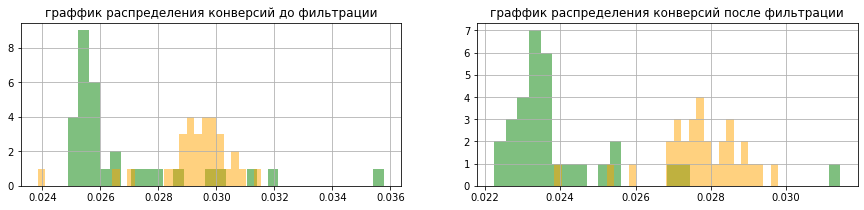

In [41]:
plt.figure(figsize = (15,3)) #сравним распределения до и после очистки данных от аномальных пользователей
plt.subplot(1,2,1)
plt.title('граффик распределения конверсий до фильтрации')
cumulativeDataA['conversion'].hist(bins = 30, color = 'green', alpha = 0.5)
cumulativeDataB['conversion'].hist(bins = 30, color = 'orange', alpha = 0.5)
plt.subplot(1,2,2)
plt.title('граффик распределения конверсий после фильтрации')
cumulativeData_clear_A['conversion'].hist(bins = 30, color = 'green', alpha = 0.5)
cumulativeData_clear_B['conversion'].hist(bins = 30, color = 'orange', alpha = 0.5)
plt.show()

Считаем статистическую значимость разницы между группами по очищенным данным

In [42]:
print('p-value. Разница конверсий A и B по очищенным данным -', '{:%}'.format(stats.mannwhitneyu(cumulativeData_clear_A['conversion'],cumulativeData_clear_B['conversion'])[1],alternative="two-sided"))

p-value. Разница конверсий A и B по очищенным данным - 0.000000%


Конверсии по группам после очистки показали более явные отличия

In [43]:
print('p-value. Разница средних чеков A и B по очищенным данным -', '{:%}'.format(stats.mannwhitneyu(cumulativeData_clear_A['revenue'] / cumulativeData_clear_A['orders'] ,cumulativeData_clear_B['revenue'] / cumulativeData_clear_B['orders'])[1],alternative="two-sided"))

p-value. Разница средних чеков A и B по очищенным данным - 33.126029%


Нулевая гипотеза о равенстве средних чеков по 2м группам подтвердилась, и с ещё большой долей вероятности можно утверждать о равенстве средних чеках в 2х группах.

Визуализируем кумулятивные метрики (конверсия, средний чек) по очищенным данным.

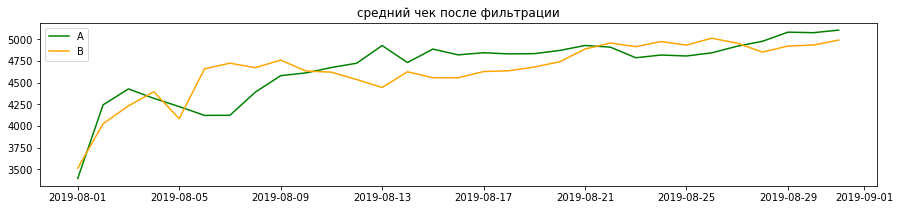

In [44]:
plt.figure(figsize = (15,3))
plt.plot(cumulativeData_clear_A['date'], cumulativeData_clear_A['revenue']/cumulativeData_clear_A['orders'], label='A', color = 'green')
plt.plot(cumulativeData_clear_B['date'], cumulativeData_clear_B['revenue']/cumulativeData_clear_B['orders'], label='B', color = 'orange')
plt.title('средний чек после фильтрации')
plt.legend() 
plt.show()

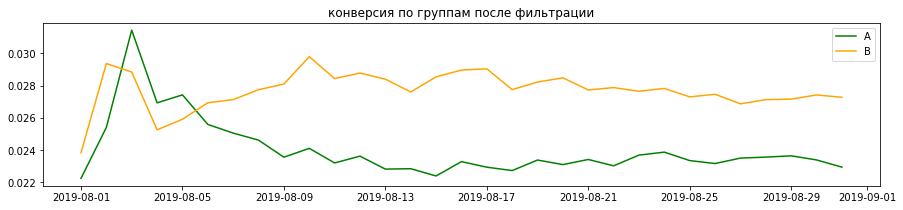

In [45]:
plt.figure(figsize = (15,3))
plt.title('конверсия по группам после фильтрации')
plt.plot(cumulativeData_clear_A['date'], cumulativeData_clear_A['conversion'], label='A', color = 'green')
plt.plot(cumulativeData_clear_B['date'], cumulativeData_clear_B['conversion'], label='B', color = 'orange')
plt.legend()
plt.show()

In [46]:
difference_conversion = cumulativeData_clear_B[cumulativeData_clear_B['date'].max() == cumulativeData_clear_B['date']]['conversion'].max() - cumulativeData_clear_A[cumulativeData_clear_A['date'].max() == cumulativeData_clear_A['date']]['conversion'].max()

print('разница в конверсиях по очищенным данным на конец периода составляет','{:%}'.format(difference_conversion))

разница в конверсиях по очищенным данным на конец периода составляет 0.432802%


### Вывод

Проверка статистической значимости различий и оценка стабильности кумулятивных метрик групп А и B показали, что при условно равных средних чеках, группа B показывает более "выгодные" показатели по конверсии. 

## Общий вывод

По результатам проверки очищенных данных - тест можно остановить и признать, что группа "B" рентабельнее.